## Basics: variables, if statements, printing output
***

In [15]:
x<-5
print(x)

[1] 5


In [16]:
if(x<5){
    print("The value of x is less than 5")
} else{
    print("The value of x is greater than or equal to 5")
}

[1] "The value of x is greater than or equal to 5"


## Data frames
***
### The basic useful way to manage data in R is with a so-called *data frame*. We can create one manually:

In [94]:
df<-data.frame(variable1 = c(5,7,9), variable2=c(2,4,6))
df

variable1,variable2
5,2
7,4
9,6


### It's easy to add functions of variables as new variables. For renaming and dropping variables, see the next lesson notebook.

In [95]:
df$variable2_squared <- df$variable2^2
df

variable1,variable2,variable2_squared
5,2,4
7,4,16
9,6,36


## To make things more interesting, let's loading in some real data
***
### This data gives the US average wage by industry and year, from the Quarterly Census of Employment and Wages

In [91]:
projectpath<-"C:/Users/Len/Dropbox/Teaching/Data TA/R tutorial/sample project/"
df <- read.csv(paste0(projectpath,"raw data/qcew_wages_industrybyyear_naics.csv"))

## Exploring/working with a dataframe by "*slicing*" it, i.e. indexing it as a matrix
***
### We can look at the first 5 rows of the dataframe:

In [4]:
df[1:5, ]

year,naics,wage
1990,1111,14667.21
1990,1112,12264.32
1990,1113,10557.79
1990,1114,14888.62
1990,1119,13482.87


In [6]:
# A "comment" in R can be made with the "#" symbol
# Let's ask R to print how many records are in df:
print(length(df[,1]))

[1] 8008


In [10]:
#First five values of wage only:
df$wage[1:5]

[1] 14667.21 12264.32 10557.79 14888.62 13482.87

In [28]:
print(paste0("Mean industry wage: ", mean(df$wage)))
print(paste0("Max industry wage: ", max(df$wage)))

[1] "Mean industry wage: 41390.2396774684"
[1] "Max industry wage: 226189.599662489"


In [40]:
#What if I want to display these more pretty-like?
print(paste0("Mean industry wage: $", round(mean(df$wage),2)))
print(paste0("Mean industry wage: $", round(mean(df$wage),-3)/1000, "k"))


[1] "Mean industry wage: $41390.24"
[1] "Mean industry wage: $41k"


## Suppose we wanted to look up the wage for manufacturing in year 2000. The "NAICS code" for manufacturing is 1013. We can do this by slicing `df` with the logical vector `df$naics==1111 & df$year==1990`:

In [61]:
df[df$naics==1111 & df$year==1990,]
#Be careful, if you used "&&" here it would only apply the AND operation on the first row!

year,naics,wage
1990,1111,14667.21


## <span style="color:blue">Exercise</span>: what is the average wage for Financial Activities in 2015?
## Industry codes are listed <a href="https://data.bls.gov/cew/doc/titles/industry/industry_titles.htm">here</a>

## Suppose we wanted to plot average nominal wages for manufacturing over time:
***

In [71]:
#Step one: create a dataframe with average manufacturing wage, by year
dfmanuf<-df[df$naics==1111,]
dfmanuf

,year,naics,wage
1,1990,1111,14667.21
310,1991,1111,14755.24
619,1992,1111,15901.33
928,1993,1111,15981.44
1237,1994,1111,16696.12
1546,1995,1111,17576.98
1855,1996,1111,18533.14
2164,1997,1111,19740.99
2473,1998,1111,20788.35
2782,1999,1111,21592.59


## We'll use the `ggplot` plotting library for this, which must be installed. `ggplot` has a formula based syntax that takes some getting used to.

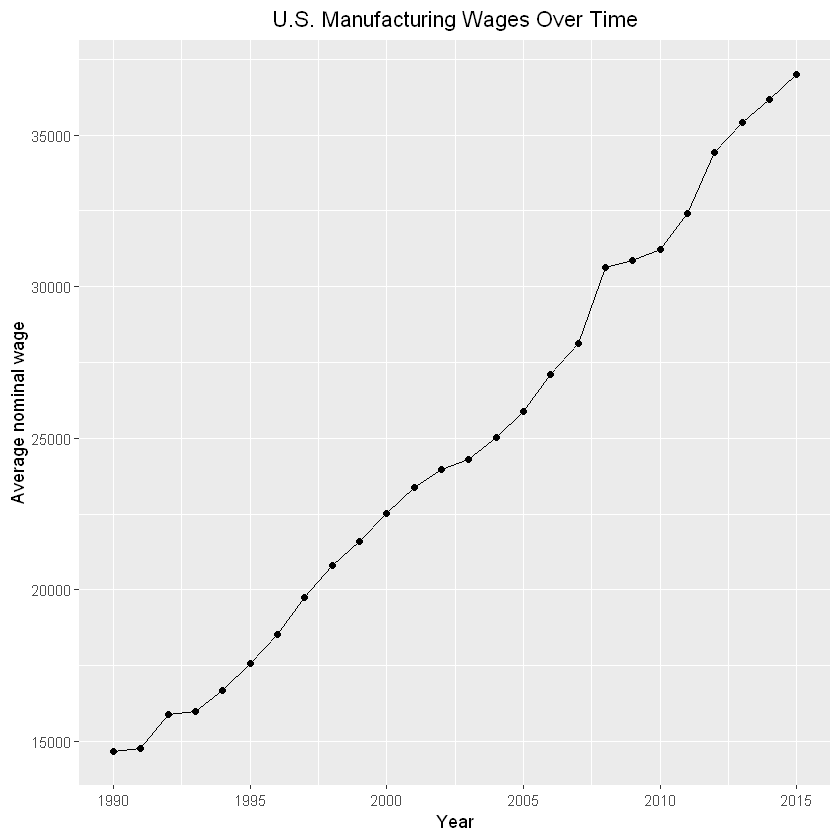

In [83]:
#install.packages("ggplot2")
library(ggplot2)

#ggplot titles by default show up on the left. I like them in the middle:
theme_update(plot.title = element_text(hjust = 0.5))

ggplot(data=dfmanuf, aes(x=year, y=wage, group=1)) +
  geom_line()+
  geom_point()+
  labs(title="U.S. Manufacturing Wages Over Time", x="Year", y = "Average nominal wage")

## We can also save this plot to a file (e.g. to put it in our paper). Remember the project folder!

In [92]:
ggsave(filename = paste0(projectpath,'figures/wagesbyyear.png'), width = 10, height = 5, dpi=500)